In [83]:
# First Reddit Bot
# https://praw.readthedocs.io/en/latest/tutorials/reply_bot.html

# import Python Reddit Api Wrapper
import praw
# config is a python file written by me
import config

subreddit_str = 'rickandmorty'
subreddit = reddit.subreddit(subreddit_str)

def bot_login():
    reddit = praw.Reddit(username = config.username,
                password = config.password,
                client_id = config.client_id,
                client_secret = config.client_secret,
                user_agent = "My first python bot v0.1")
    return reddit

def set_subreddit(str):
    global subreddit_str 
    subreddit_str = str
    global subreddit 
    subreddit = reddit.subreddit(subreddit_str)

def run_bot(reddit):
    word = "Rick"
    word2 = "Morty"
    word_users = set()   # to avoid duplicates
    word_users2 = set()
    for comment in reddit.subreddit.comments(limit=250):
        if word in comment.body:
            word_users.add(comment.author)
        if word2 in comment.body:
            word_users2.add(comment.author)
    print "The users that mentioned "+ word +" are :"
    for user in word_users:
        print "  " + str(user)
    print "The users that mentioned "+ word2 +" are :"
    for user in word_users2:
        print "  " + str(user)
    print str(len(word_users)) + " users mentioned "+ word
    print str(len(word_users2)) + " users mentioned "+ word2
    
def print_comments(reddit):
    #submission.comment_sort = 'hot'
    for comment in reddit.subreddit.comments(limit=250):
        print comment.body
        
def print_hot_titles(reddit, n):
    print n,'HOT POSTS: '
    for submission in subreddit.hot(limit=n):
        print(' - '+submission.title)
        
def print_submission_info(reddit, n):
    print n,'SUBMISSION INFO: '
    # Assume you have a Subreddit instance bound to variable `subreddit`
    for submission in subreddit.hot(limit=n):
        print(submission.title)  # Output: the submission's title
        print(' - Score: '+str(submission.score))  # Output: the submission's score
        print(' - ID   : '+str(submission.id))     # Output: the submission's ID
        print(' - URL  : '+str(submission.url))    # Output: the URL the submission points to
        redditor_op = submission.author
        print(' - OP   :'+str(redditor_op.name))  # Output: name of the redditor
    print ''

def print_subreddit_info():
    print 'SUBREDDIT INFO: '
    print(subreddit.display_name)  # Output: redditdev
    print('-'+subreddit.title)         # Output: reddit Development
    print('-'+subreddit.description)   # Output: A subreddit for discussion of ...
    print ''
        
#print '* _ Settings _ *'
#reddit.read_only = True # Sets Reddit to READ ONLY
#print 'Can only READ posts:',reddit.read_only,'\n'

#reddit = bot_login()
#run_bot(r)
#print_submission_info(reddit,3)
#print_hot_titles(reddit,3)


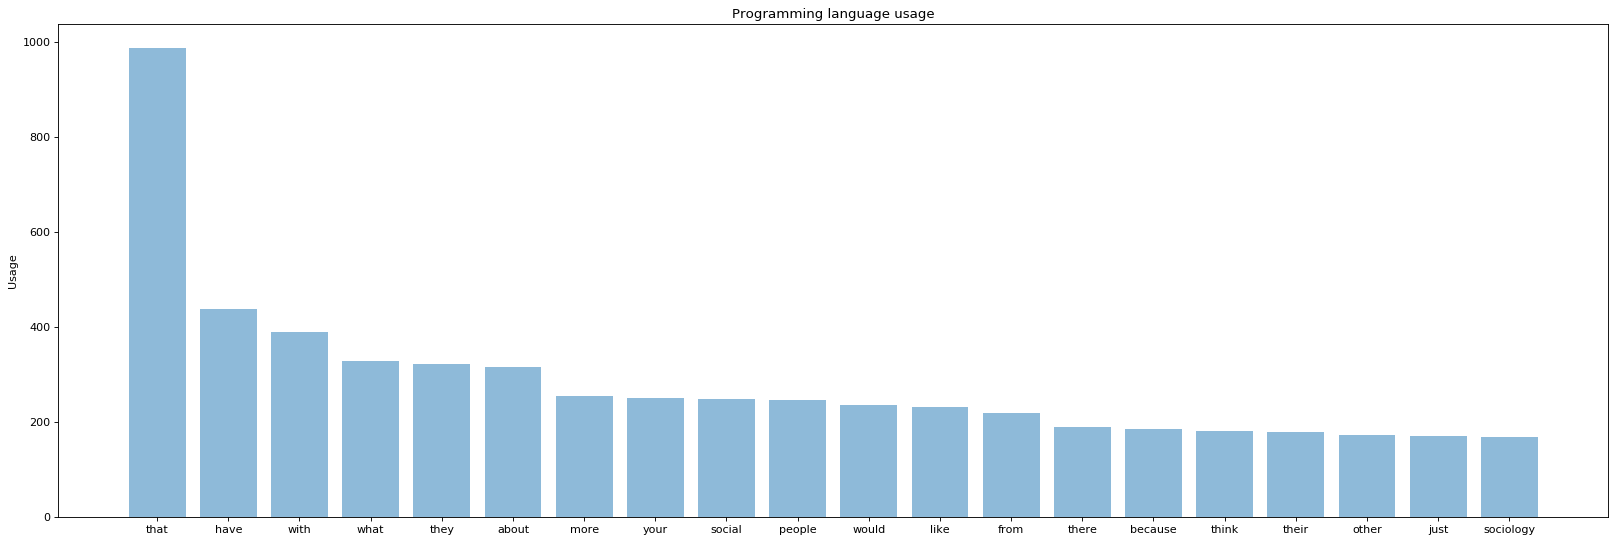

In [114]:
set_subreddit('sociology')

wordList = list()
subreddit.comment_sort = 'hot'
ctr = 0
for comment in subreddit.comments(limit=1000):
    ctr += 1
    comment_text = comment.body
    #print comment_text
    for word in comment_text.split():
        word = word.lower() # Case insensitive
        if word[ len(word)-1 ]=='.' or word[ len(word)-1 ]=='s':
            word = word[: len(word)-1 ]
        wordList.append(word.lower())
                
from collections import Counter
wordList = list(wordList)
counts = Counter(wordList)
common_counts = counts.most_common(50)
count_numbs = list()
count_names = list()
for i in common_counts:
    if len(i[0]) > 3:
        #print i[0],': ',i[1]
        count_numbs.append(i[1])
        count_names.append(i[0])
        
        
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
performance = count_numbs

objects = count_names
y_pos = np.arange(len(objects))
 
plt.figure(num=None, figsize=(25, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
    
plt.show()
